# Import Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [4]:
pd.set_option("display.max_column",100)

In [ ]:
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
try:
    df_train = pd.read_csv("train.csv")
    df_test = pd.read_csv("test.csv")
except FileNotFoundError:
    print("File not found!")

# Data Dictionary

In [ ]:
# Gender: Gender of the passengers (Female, Male)
# Customer Type: The customer type (Loyal customer, disloyal customer)
# Age: The actual age of the passengers
# Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
# Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
# Flight distance: The flight distance of this journey
# Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
# Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
# Ease of Online booking: Satisfaction level of online booking
# Gate location: Satisfaction level of Gate location
# Food and drink: Satisfaction level of Food and drink
# Online boarding: Satisfaction level of online boarding
# Seat comfort: Satisfaction level of Seat comfort
# Inflight entertainment: Satisfaction level of inflight entertainment
# On-board service: Satisfaction level of On-board service
# Leg room service: Satisfaction level of Leg room service
# Baggage handling: Satisfaction level of baggage handling
# Check-in service: Satisfaction level of Check-in service
# Inflight service: Satisfaction level of inflight service
# Cleanliness: Satisfaction level of Cleanliness
# Departure Delay in Minutes: Minutes delayed when departure
# Arrival Delay in Minutes: Minutes delayed when Arrival
# Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
# Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

In [ ]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# EDA

In [ ]:
print("Rows: ",df_test.shape[0] + df_train.shape[0]) 
print("Columns: ", df_train.shape[1]) 

Rows:  129880
Columns:  25


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
df_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df_train.drop(["Unnamed: 0","id"],axis=1, inplace=True)
df_test.drop(["Unnamed: 0","id"],axis=1,inplace=True)

In [ ]:
for col in ["Gender","Customer Type","Type of Travel","satisfaction","Class"]:
    print(df_train[col].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['neutral or dissatisfied' 'satisfied']
['Eco Plus' 'Business' 'Eco']


In [ ]:
df_train['satisfaction'] = df_train["satisfaction"].map({"neutral or dissatisfied":0, "satisfied":1})
df_train['satisfaction'] = df_train['satisfaction'].astype(int)

df_test['satisfaction'] = df_test["satisfaction"].map({"neutral or dissatisfied":0, "satisfied":1})
df_test['satisfaction'] = df_test['satisfaction'].astype(int)

In [ ]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
len(df_train[df_train['Arrival Delay in Minutes'] == 0])

58159

In [ ]:
df_train['Arrival Delay in Minutes'].nunique()

455

In [ ]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean())
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean())

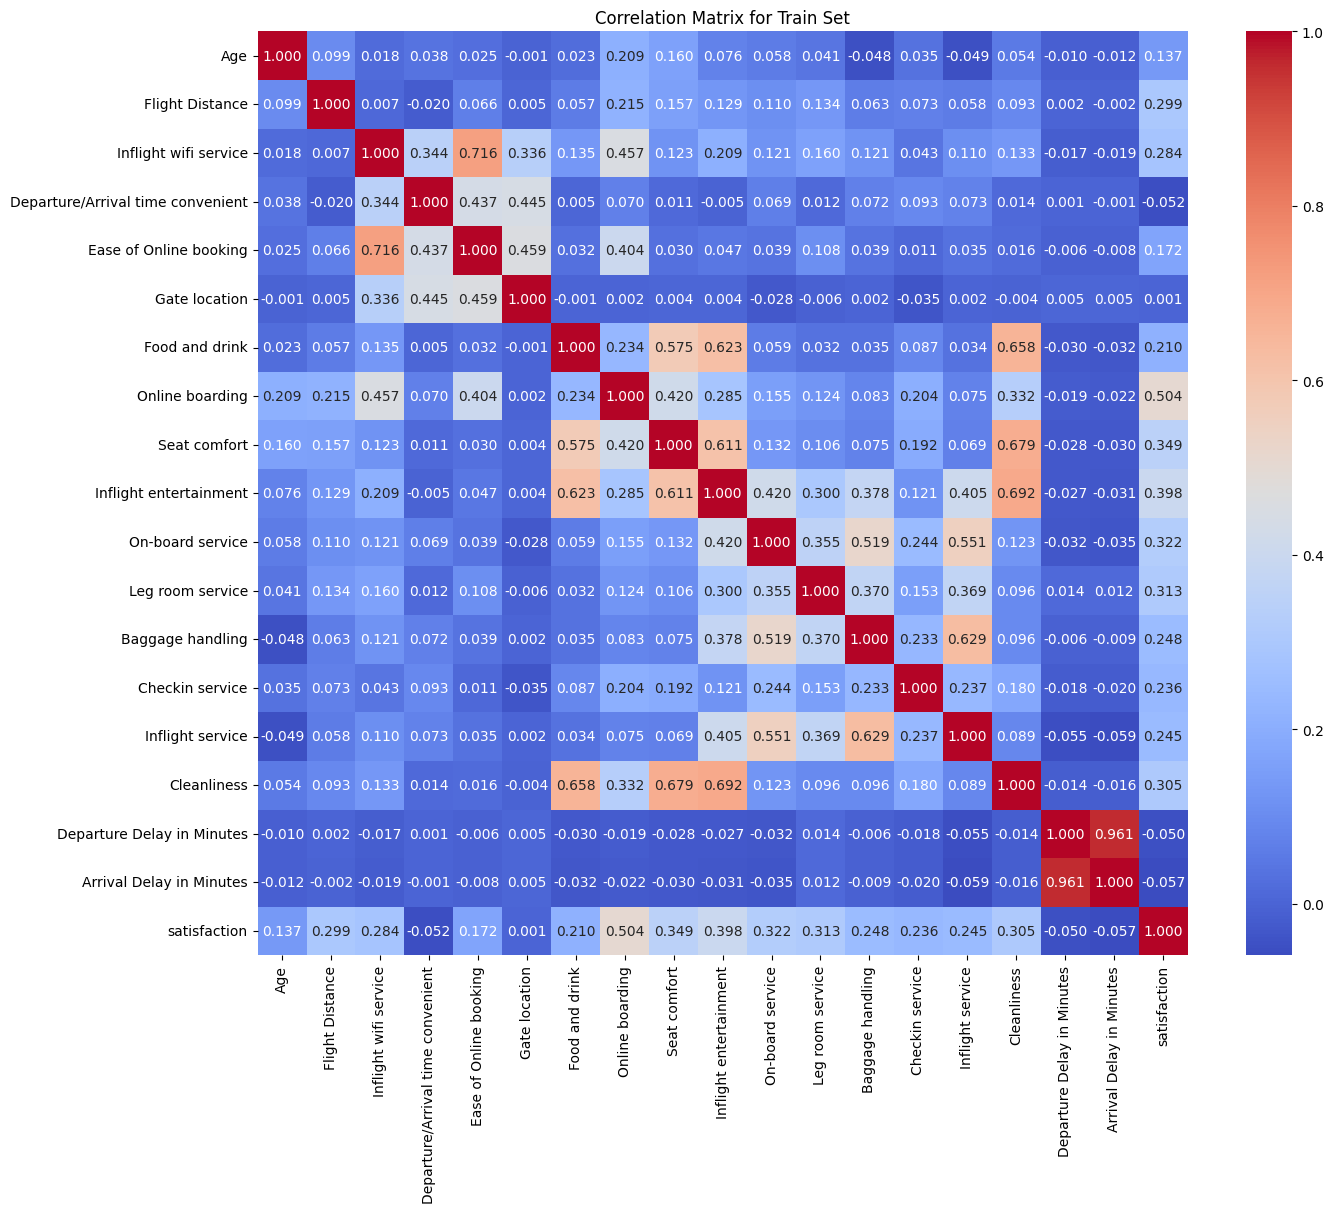

In [ ]:
#Correlation
plt.figure(figsize=(15,12))
sns.heatmap(data=df_train.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Matrix for Train Set")
plt.show()

In [ ]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr(numeric_only=True)
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                colname = corr.columns[i]
                columns_to_drop.add(colname)
    return columns_to_drop

correlation_for_dropping(df_train, 0.9)

{'Arrival Delay in Minutes'}

# Check Outliers Values

In [ ]:
def find_outliers_iqr(df, threshold):
    outlier_summary = {}
    numeric_cols = df.select_dtypes("number")

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            "Outlier Count " : outliers.shape,
            "Outlier Percentage" : 100 * outliers.shape[0] / df.shape[0],
            "Lower Bound" : lower_bound,
            "Upper Bound" : upper_bound
        }

    return pd.DataFrame(outlier_summary)

find_outliers_iqr(df_train, threshold=1.5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Outlier Count,"(0, 23)","(2291, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(12891, 23)","(0, 23)","(0, 23)","(14529, 23)","(13954, 23)","(0, 23)"
Outlier Percentage,0.0,2.20492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.406645,0.0,0.0,13.9831,13.429704,0.0
Lower Bound,-9.0,-1579.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.5,-1.0,-1.0,-1.0,0.0,1.5,0.0,-1.0,-18.0,-19.5,-1.5
Upper Bound,87.0,3736.5,7.0,7.0,7.0,7.0,7.0,7.0,9.5,7.0,7.0,7.0,8.0,5.5,8.0,7.0,30.0,32.5,2.5


In [ ]:
find_outliers_iqr(df_test, threshold=1.5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Outlier Count,"(0, 23)","(584, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(0, 23)","(3218, 23)","(0, 23)","(0, 23)","(3569, 23)","(3538, 23)","(0, 23)"
Outlier Percentage,0.0,2.248229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.388358,0.0,0.0,13.739606,13.620265,0.0
Lower Bound,-9.0,-1581.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.5,-1.0,-1.0,-1.0,0.0,1.5,0.0,-1.0,-18.0,-19.5,-1.5
Upper Bound,87.0,3739.0,7.0,7.0,7.0,7.0,7.0,7.0,9.5,7.0,7.0,7.0,8.0,5.5,8.0,7.0,30.0,32.5,2.5


# Train-Test Split

In [ ]:
X_train = df_train.drop("satisfaction",axis=1)
y_train = df_train["satisfaction"]

X_test = df_test.drop("satisfaction", axis=1)
y_test = df_test["satisfaction"]

# Data Preperation

In [ ]:
cols_to_scale = X_train.select_dtypes("number").columns
cols_to_encode = X_train.select_dtypes(exclude=["number"]).columns

preprocessor = ColumnTransformer(transformers=[
    ("encoder",OneHotEncoder(handle_unknown="ignore",drop="first",sparse_output=False),cols_to_encode),
    ("scaler",StandardScaler(),cols_to_scale)
], remainder="passthrough"
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

names = preprocessor.get_feature_names_out()

X_train_transformed = pd.DataFrame(X_train_transformed, columns=names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=names)

In [ ]:
X_train_transformed.head()

,encoder__Gender_Male,encoder__Customer Type_disloyal Customer,encoder__Type of Travel_Personal Travel,encoder__Class_Eco,encoder__Class_Eco Plus,scaler__Age,scaler__Flight Distance,scaler__Inflight wifi service,scaler__Departure/Arrival time convenient,scaler__Ease of Online booking,scaler__Gate location,scaler__Food and drink,scaler__Online boarding,scaler__Seat comfort,scaler__Inflight entertainment,scaler__On-board service,scaler__Leg room service,scaler__Baggage handling,scaler__Checkin service,scaler__Inflight service,scaler__Cleanliness,scaler__Departure Delay in Minutes,scaler__Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,1.0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393,0.073014
1,1.0,1.0,0.0,0.0,0.0,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.237539
2,0.0,0.0,0.0,0.0,0.0,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.392816
3,0.0,0.0,0.0,0.0,0.0,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.159901
4,1.0,0.0,0.0,0.0,0.0,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.392816


In [ ]:
X_test_transformed.head()

,encoder__Gender_Male,encoder__Customer Type_disloyal Customer,encoder__Type of Travel_Personal Travel,encoder__Class_Eco,encoder__Class_Eco Plus,scaler__Age,scaler__Flight Distance,scaler__Inflight wifi service,scaler__Departure/Arrival time convenient,scaler__Ease of Online booking,scaler__Gate location,scaler__Food and drink,scaler__Online boarding,scaler__Seat comfort,scaler__Inflight entertainment,scaler__On-board service,scaler__Leg room service,scaler__Baggage handling,scaler__Checkin service,scaler__Inflight service,scaler__Cleanliness,scaler__Departure Delay in Minutes,scaler__Arrival Delay in Minutes
0,0.0,0.0,0.0,1.0,0.0,0.834958,-1.032398,1.709804,0.616172,0.173776,0.800803,-0.152031,0.555482,-0.333108,1.231704,1.255590,1.253380,1.158582,-1.030742,1.156436,1.305870,0.920317,0.745879
1,0.0,0.0,0.0,0.0,0.0,-0.223601,1.678348,-1.302646,-1.350954,0.173776,-1.547323,1.352264,0.555482,1.183099,0.481508,0.479403,0.493270,0.311769,-0.240472,0.305848,1.305870,-0.387532,-0.392816
2,1.0,1.0,0.0,1.0,0.0,-1.282160,-1.000307,-0.549533,-2.006662,-0.541060,0.800803,-0.904178,-0.926545,-1.091211,-1.018885,0.479403,-1.787061,-0.535045,-1.030742,-1.395328,-0.980251,-0.387532,-0.392816
3,1.0,0.0,0.0,0.0,0.0,0.305678,2.193821,-2.055758,-2.006662,-1.970731,-0.764614,-0.152031,0.555482,0.424996,-1.769081,-1.849161,-1.787061,-2.228672,-0.240472,-2.245916,0.543829,-0.387532,-0.237539
4,0.0,0.0,0.0,1.0,0.0,0.636478,-0.007470,-0.549533,-0.039537,0.888612,0.018094,0.600117,-1.667559,-1.091211,-1.018885,-1.072973,-1.026951,-1.381858,0.549799,-1.395328,0.543829,-0.387532,0.124773


# Train the Models

In [ ]:
def calculate_model_metric(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)

    return accuracy, classification, matrix

Train Evaluation for Logistic Regression: 
Accuracy Score: 0.8752 

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.90      0.89     58879
           1       0.87      0.84      0.85     45025

    accuracy                           0.88    103904
   macro avg       0.87      0.87      0.87    103904
weighted avg       0.88      0.88      0.87    103904

Confusion Matrix: 
 [[53282  5597]
 [ 7375 37650]]


Test Evaluation for Logistic Regression: 
Accuracy Score: 0.8717 

Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Confusion Matrix: 
 [[13142  1431]
 [ 1901  9502]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

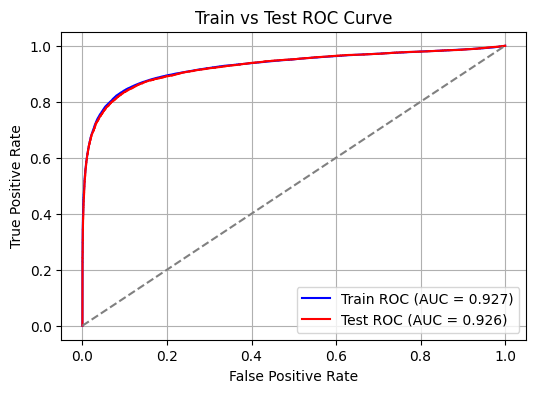

Train Evaluation for Random Forest Classifier: 
Accuracy Score: 1.0000 

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904

Confusion Matrix: 
 [[58879     0]
 [    0 45025]]


Test Evaluation for Random Forest Classifier: 
Accuracy Score: 0.9623 

Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix: 
 [[14266   307]
 [  672 10731]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

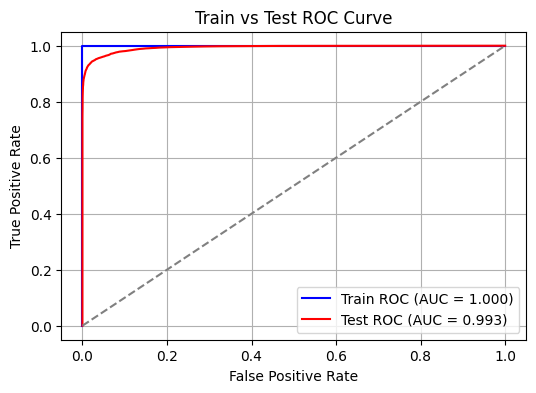

Train Evaluation for Gradient Boose Classifier: 
Accuracy Score: 0.9406 

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.96      0.95     58879
           1       0.94      0.92      0.93     45025

    accuracy                           0.94    103904
   macro avg       0.94      0.94      0.94    103904
weighted avg       0.94      0.94      0.94    103904

Confusion Matrix: 
 [[56435  2444]
 [ 3732 41293]]


Test Evaluation for Gradient Boose Classifier: 
Accuracy Score: 0.9404 

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14573
           1       0.95      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Confusion Matrix: 
 [[13965   608]
 [  940 10463]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

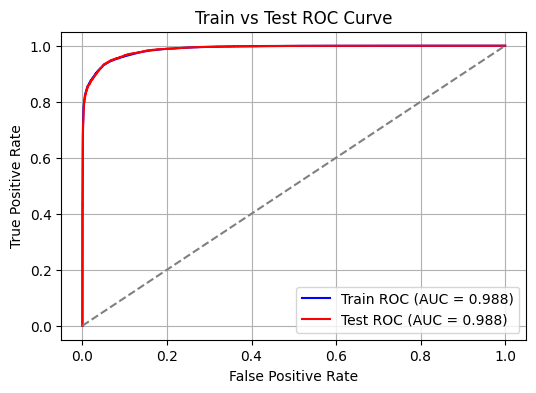

Train Evaluation for XGBoost Classifier: 
Accuracy Score: 0.9747 

Classification Report: 

               precision    recall  f1-score   support

           0       0.97      0.99      0.98     58879
           1       0.98      0.96      0.97     45025

    accuracy                           0.97    103904
   macro avg       0.98      0.97      0.97    103904
weighted avg       0.97      0.97      0.97    103904

Confusion Matrix: 
 [[58150   729]
 [ 1899 43126]]


Test Evaluation for XGBoost Classifier: 
Accuracy Score: 0.9635 

Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix: 
 [[14258   315]
 [  633 10770]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

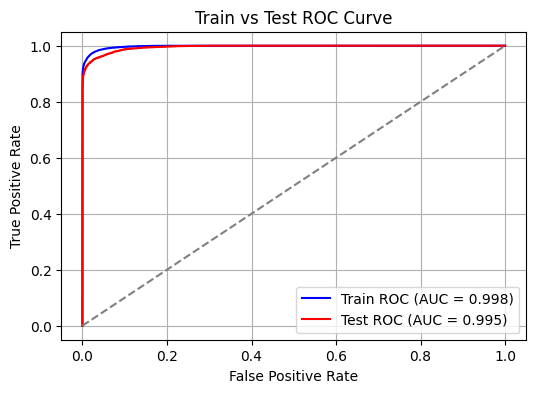

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 45025, number of negative: 58879
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268267
[LightGBM] [Info] Start training from score -0.268267
Train Evaluation for LightGBM Classifier: 
Accuracy Score: 0.9658 

Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58879
           1       0.98      0.94      0.96     45025

    accuracy                           0.97    103904
   macro avg       0.97      0.96      0.97    103

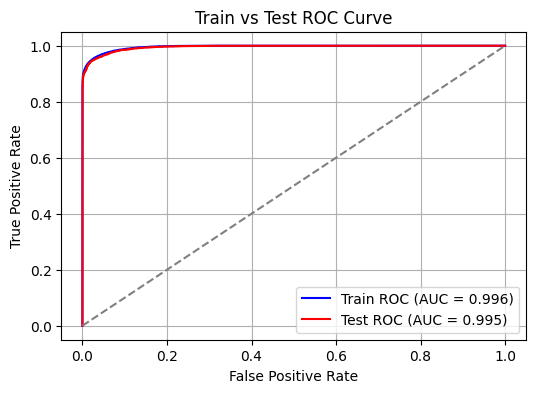

In [ ]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Random Forest Classifier" : RandomForestClassifier(n_jobs=-1),
    "Gradient Boost Classifier" : GradientBoostingClassifier(),
    "XGBoost Classifier" : XGBClassifier(),
    "LightGBM Classifier" : LGBMClassifier(n_jobs=-1)
}

for name, model in models.items():
    model.fit(X_train_transformed,y_train)

    y_pred_train = model.predict(X_train_transformed)
    y_pred_test = model.predict(X_test_transformed)

    accuracy_train, classification_report_train, confusion_matrix_train = calculate_model_metric(y_train, y_pred_train)
    accuracy_test, classification_report_test, confusion_matrix_test = calculate_model_metric(y_test, y_pred_test)

    print(f"Train Evaluation for {name}: ")
    print(f"Accuracy Score: {accuracy_train:.4f}", "\n")
    print("Classification Report: \n\n", classification_report_train)
    print("Confusion Matrix: \n",confusion_matrix_train)
    print("\n")

    print(f"Test Evaluation for {name}: ")
    print(f"Accuracy Score: {accuracy_test:.4f}","\n")
    print("Classification Report: \n\n", classification_report_test)
    print("Confusion Matrix: \n",confusion_matrix_test)
    print("~" * 75)

    y_pred_train_proba = model.predict_proba(X_train_transformed)[:,1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_proba)
    auc_score_train = roc_auc_score(y_train, y_pred_train_proba)

    y_pred_test_proba = model.predict_proba(X_test_transformed)[:,1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_proba)
    auc_score_test = roc_auc_score(y_test, y_pred_test_proba)

    plt.figure(figsize=(6,4))
    plt.plot(fpr_train, tpr_train, color="blue", label=f"Train ROC (AUC = {auc_score_train:.3f})")
    plt.plot(fpr_test, tpr_test, color="red", label=f"Test ROC (AUC = {auc_score_test:.3f})")
    plt.plot([0,1], [0,1], color="gray", linestyle="--")  # random reference line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Train vs Test ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

# Hyper Parameter Tuning

In [ ]:
rfr_params = {
    "n_estimators" : [100, 200, 300, 500],
    "max_depth" : [3, 5, 8],
    "max_features" : ["log2","sqrt",5]
}
gb_params = {
    "n_estimators" : [100, 200, 300, 500],
    "learning_rate" : [0.001, 0.01, 0.1],
    "subsample" : [0.8, 1]
}
xgboost_params = {
    "n_estimators" : [100, 200, 300, 500],
    "max_depth" : [3, 5, 8, 11],
    "learning_rate" : [0.001, 0.01, 0.1]
}

random_models = [
    ("Random Forest Classifier",RandomForestClassifier(),rfr_params),
    ("Gradient Boost Classifier",GradientBoostingClassifier(), gb_params),
    ("XGBoost Classifier", XGBClassifier(),xgboost_params)
]

for name, model,params in random_models:
    random = RandomizedSearchCV(
                                estimator=model,
                                param_distributions=params,
                                cv=5,
                                verbose=1,
                                n_iter=10,
                                n_jobs=-1,
                                scoring="accuracy"
    )

    random.fit(X_train_transformed, y_train)
    print(f"Best parameters for {name}: ",random.best_estimator_)
    print("-" * 75)
    print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest Classifier:  RandomForestClassifier(max_depth=8, max_features=5, n_estimators=300)
---------------------------------------------------------------------------

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Gradient Boost Classifier:  GradientBoostingClassifier(n_estimators=500, subsample=1)
---------------------------------------------------------------------------

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBoost Classifier:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constra

In [ ]:
y_pred = random.predict(X_test_transformed)

random_accuracy, random_report, random_matrix = calculate_model_metric(y_test,y_pred)

print(f"Test Evaluation: ")
print(f"Accuracy Score: {random_accuracy:.4f}","\n")
print("Classification Report: \n\n", random_report)
print("Confusion Matrix: \n",random_matrix)

Test Evaluation: 
Accuracy Score: 0.9633 

Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix: 
 [[14249   324]
 [  630 10773]]


In [ ]:
# RandomForestClassifier(max_depth=8, n_estimators=300,max_features=5)
# GradientBoostingClassifier(n_estimators=500, subsample=1)

model1 = RandomForestClassifier(max_depth=8,n_estimators=300,max_features=5)
model1.fit(X_train_transformed,y_train)
y_pred_1 = model1.predict(X_test_transformed)
print(f"Accuracy Score for Random Forest Classifier: {accuracy_score(y_test,y_pred_1):.4f}")

model2 = GradientBoostingClassifier(n_estimators=500, subsample=1)
model2.fit(X_train_transformed,y_train)
y_pred_2 = model2.predict(X_test_transformed)
print(f"Accuracy Score for Gradient Boost Classifier: {accuracy_score(y_test,y_pred_2):.4f}")

Accuracy Score for Random Forest Classifier: 0.9376
Accuracy Score for Gradient Boost Classifier: 0.9589


# Save Model

In [ ]:
import joblib

best_rf_params = {
    'n_estimators': 300,
    'max_depth': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 'sqrt'
}

best_estimator = RandomForestClassifier(random_state=42, n_jobs=-1, **best_rf_params)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', best_estimator)   # Random Forest Model
])

final_pipeline.fit(X_train, y_train)


model_filename = 'best_satisfaction_model_pipeline.pkl'
joblib.dump(final_pipeline, model_filename)

print(f"Best model (Random Forest Pipeline) was saved succesfully: {model_filename}")

Best model (Random Forest Pipeline) was saved succesfully: best_satisfaction_model_pipeline.pkl
